<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6122877

### Student Name: Yingjin Song
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [1]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
from fractions import Fraction
from decimal import *
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [3]:
# YOUR CODE HERE

# Read data from file 'bike-share.csv' 
df_biking = pd.read_csv("bike-share.csv") 

# Preview the first 5 lines of the loaded data 
df_biking.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Delete the 'instant' column
df_biking.drop(df_biking.columns[[0]], axis=1, inplace=True)


In [5]:
# Rename some columns
df_biking.rename(columns={'dteday':'date',
                            'yr':'2011or2012',
                            'mnth':'month',
                            'weathersit':'weather_situation',
                            'atemp':'feeling_temp',
                            'cnt':'total'}, 
                 inplace=True)

In [6]:
# Change the datatype of date to datetime
df_biking['date'] = pd.to_datetime(df_biking['date'])

In [7]:
# Deal with temperature data to let it make more sense to the context
df_biking['temp'] = df_biking['temp'].apply(lambda x: x*41)
df_biking['feeling_temp'] = df_biking['feeling_temp'].apply(lambda x: x*50)
df_biking.head()

,date,season,2011or2012,month,holiday,weekday,workingday,weather_situation,temp,feeling_temp,hum,windspeed,casual,registered,total
0,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,0.436957,0.186900,82,1518,1600


## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

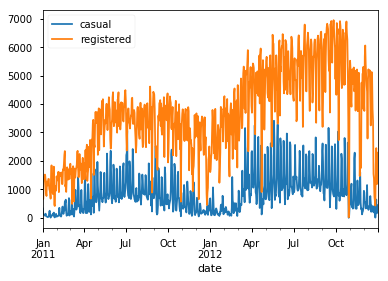

In [8]:
# Plot the general trends of the variation of the number of 'casual' and 'registered' orders in the two years 
plt_cr = df_biking.plot(x="date", y=["casual", "registered"])

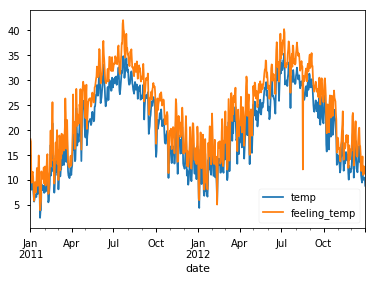

In [9]:
plt_temp = df_biking.plot(x="date", y=["temp", "feeling_temp"])

Text(0.5,1,'Relation of Windspeed vs Total Orders')

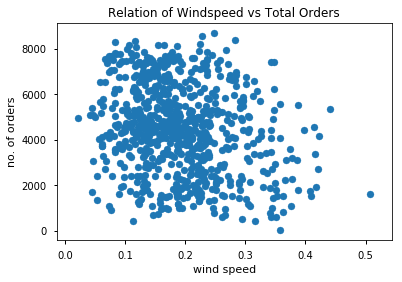

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df_biking.windspeed, df_biking.total)
ax.set_xlabel('wind speed')
ax.set_ylabel('no. of orders')
ax.set_title('Relation of Windspeed vs Total Orders')

Text(0.5,1,'Relation of Humidity vs Total Orders')

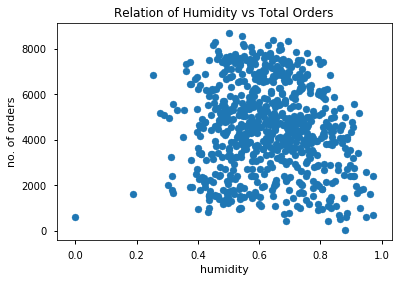

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_biking.hum, df_biking.total)
ax1.set_xlabel('humidity')
ax1.set_ylabel('no. of orders')
ax1.set_title('Relation of Humidity vs Total Orders')

Text(0.5,1,'Relation of Month vs Season')

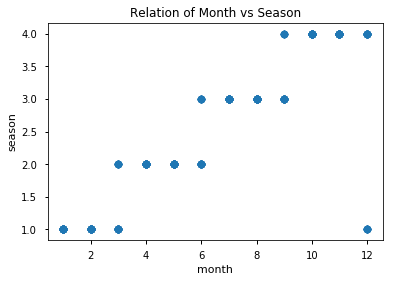

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_biking.month, df_biking.season)
ax1.set_xlabel('month')
ax1.set_ylabel('season')
ax1.set_title('Relation of Month vs Season')

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

Text(0.5,1,'Relation Of Weather Situation & Outside Temperature VS Number of Bikes Rented On A Given Day')

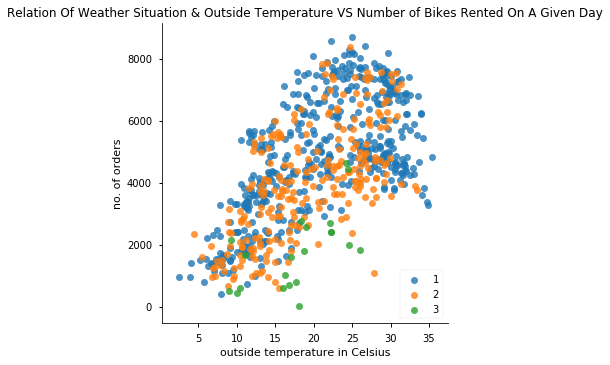

In [13]:
sns.lmplot( x="temp", y="total", data=df_biking, fit_reg=False, hue='weather_situation', legend=False)
plt.legend(loc='lower right')
plt.xlabel('outside temperature in Celsius')
plt.ylabel('no. of orders')
plt.title('Relation Of Weather Situation & Outside Temperature VS Number of Bikes Rented On A Given Day')

<span style="color:blue">
    
### ANALYSIS


</span>

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(df_biking.temp, df_biking.total,c=df_biking.weather_situation,s =df_biking.weather_situation*100,label=df_biking.weather_situation)
ax.set_xlabel('outside temperature in Celsius')
ax.set_ylabel('no. of orders')
ax.set_title('Relation Of Weather Situation & Outside Temperature VS Number of Bikes Rented On A Given Day')

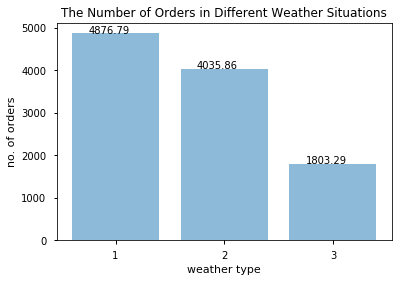

In [14]:
# Relationship between weather situation and the number of bikes rented on a given day
types= set(df_biking['weather_situation'].tolist())
y_pos = np.arange(len(types))

orders = list()
for t in types:
    df_tmp=df_biking.loc[df_biking['weather_situation']==t]
    ords = df_tmp['total'].mean()
    ords = round(ords,2)
    orders.append(ords)

plt.bar(y_pos, orders, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.xlabel('weather type')
plt.ylabel('no. of orders')
plt.title('The Number of Orders in Different Weather Situations')


li = []
for i, v in enumerate(orders):
    plt.text(y_pos[i] - 0.25, v + 0.02, str(v))
    li.append(v)
    
plt.show()
    

In [15]:
print(df_biking.total.sum())
print(df_biking.casual.sum())
print(df_biking.registered.sum())

3292679
620017
2672662


In [16]:
df_biking['weather_situation'].value_counts()

1    463
2    247
3     21
Name: weather_situation, dtype: int64

<span style="color:blue">
    
### ANALYSIS


</span>

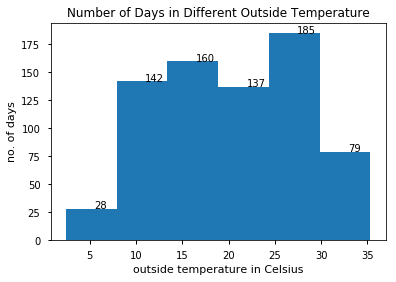

In [17]:
fig = plt.figure()
plt1 = fig.add_subplot(111)
plt1.hist(df_biking.temp, bins=6)
plt1.set_xlabel('outside temperature in Celsius')
plt1.set_ylabel('no. of days')
plt1.set_title('Number of Days in Different Outside Temperature')

ds = []
cels = []
for i, rect in enumerate(plt1.patches):  # iterate over every bar
    ds.append(rect.get_height())
    plt1.text(rect.get_width()*(i+1), rect.get_height(), int(rect.get_height()))
    cels.append(rect.get_x())
    
df_copy = df_biking
df_copy['avg'] = df_copy['total']
df_copy.total = df_copy.total.astype(float)
a=0
b=0
c=0
d=0
e=0
f=0
for i, row in df_copy.iterrows():
    if row['temp'] < cels[1]:
        a+=1
        df_copy['avg'][i] = Fraction(row['total']/ds[0])
    elif row['temp'] < cels[2]:
        b+=1
        df_copy['avg'][i] = Fraction(row['total']/ds[1])
    elif row['temp'] < cels[3]:
        c+=1
        df_copy['avg'][i] = Fraction(row['total']/ds[2])
    elif row['temp'] < cels[4]:
        d+=1
        df_copy['avg'][i] = Fraction(row['total']/ds[3])
    elif row['temp'] < cels[5]:
        e+=1
        df_copy['avg'][i] = Fraction(row['total']/ds[4])
    else:
        f+=1
        df_copy['avg'][i] = Fraction(row['total']/ds[5])

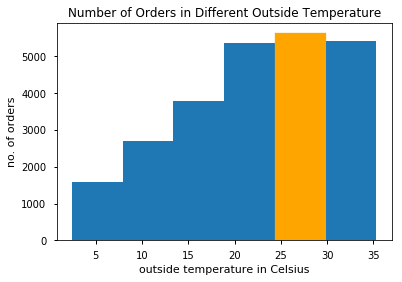

In [18]:
# Relationship between outside temperature and the number of bikes rented on a given day

fig = plt.figure()
plt2 = fig.add_subplot(111)
plt2.hist(df_copy.temp,weights=df_copy.avg.astype(float), bins=6)
#plt2.hist(df_copy.temp,weights=df_copy.avg, bins=6)
plt2.set_xlabel('outside temperature in Celsius')
plt2.set_ylabel('no. of orders')
plt2.set_title('Number of Orders in Different Outside Temperature')

heights = []
veri = 0.0
for i, rect in enumerate(plt2.patches):  # iterate over every bar
    heights.append(rect.get_height())
    #plt2.text(rect.get_width()*(i+1), rect.get_height(), int(rect.get_height()))
    veri+=float(ds[i])*float(rect.get_height())
index_of_highest_bar=heights.index(max(heights))
plt2.patches[index_of_highest_bar].set_color('orange')    

<span style="color:blue">
    
### ANALYSIS


</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

Text(0.5,1,'Relation Between The Day Of The Week & Number of Bikes Rented On A Given Day')

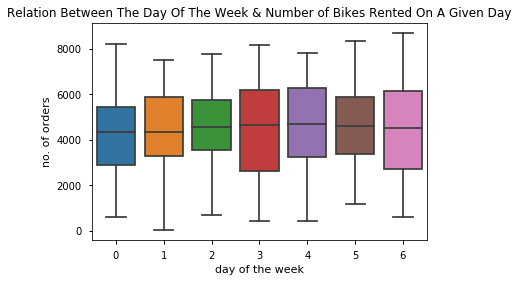

In [19]:
sns.boxplot(x=df_biking["weekday"], y=df_biking["total"])
plt.xlabel('day of the week')
plt.ylabel('no. of orders')
plt.title('Relation Between The Day Of The Week & Number of Bikes Rented On A Given Day')

Text(0.5,1,'Relation Between Holiday & Number of Bikes Rented On A Given Day')

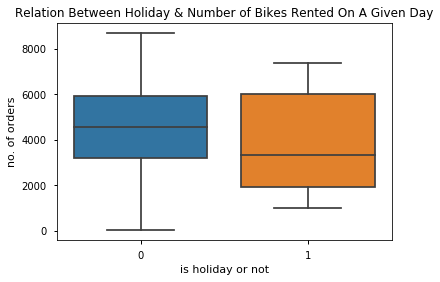

In [20]:
sns.boxplot(x=df_biking["holiday"], y=df_biking["total"])
plt.xlabel('is holiday or not')
plt.ylabel('no. of orders')
plt.title('Relation Between Holiday & Number of Bikes Rented On A Given Day')

# YOUR CODE HERE
# The relationship between the day of the week and the number of bikes rented on a given day

ord_mon = 0
ord_tue = 0
ord_wed = 0
ord_thu = 0
ord_fri = 0
ord_sat = 0
ord_sun = 0
a=0
b=0
c=0
d=0
e=0
f=0
g=0
for index, row in df_biking.iterrows():
    if row['weekday']==0:
        ord_mon += row['total']
        a+=1
    elif row['weekday']==1:
        ord_tue += row['total']
        b+=1
    elif row['weekday']==2:
        ord_wed += row['total']
        c+=1
    elif row['weekday']==3:
        ord_thu += row['total']
        d+=1
    elif row['weekday']==4:
        ord_fri += row['total']
        e+=1
    elif row['weekday']==5:
        ord_sat += row['total']
        f+=1
    elif row['weekday']==6:
        ord_sun += row['total']
        g+=1
    
print(ord_mon) 
print(ord_tue) 
print(ord_wed) 
print(ord_thu) 
print(ord_fri) 
print(ord_sat) 
print(ord_sun) 

print(a,b,c,d,e,f,g)

print(ord_mon+ord_tue+ord_wed+ord_thu+ord_fri+ord_sat+ord_sun)

days=('MON','TUE','WED','THU','FRI','SAT','SUN')
y_pos = np.arange(len(days))
orders = [ord_mon,ord_tue,ord_wed,ord_thu,ord_fri,ord_sat,ord_sun]
 
plt.bar(y_pos, orders, align='center', alpha=0.5)
plt.xticks(y_pos, days)
plt.xlabel('weekdays')
plt.ylabel('total orders')
plt.title('The Number of Orders in Different Weekdays')

for i, v in enumerate(orders):
    plt.text(y_pos[i] - 0.4, v + 0.01, str(v))
    
plt.show()


# The relationship between the holiday and the number of bikes rented on a given day
ord_h=0
ord_nh=0
hd=0
nhd=0

for index, row in df_biking.iterrows():
    if row['holiday']==1:
        ord_h += row['total']
        hd +=1
    else:
        ord_nh += row['total']
        nhd+=1
        
print(ord_h,ord_nh,hd,nhd)
print(ord_h+ord_nh)
avg_hd = round(ord_h/hd,2) 
avg_nhd = round(ord_nh/nhd,2)


holidays=('holiday','not holiday')
y_pos = np.arange(len(holidays))
orders = [avg_hd,avg_nhd]
 
plt.bar(y_pos, orders, align='center', alpha=0.5)
plt.xticks(y_pos, holidays)
plt.xlabel('is holiday?')
plt.ylabel('average orders')
plt.title('The Number of Average Orders in Holidays and Non-Holidays')

for i, v in enumerate(orders):
    plt.text(y_pos[i] - 0.4, v + 0.1, str(v))
    
plt.show()


<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

In [21]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

In [22]:
# YOUR CODE HERE


# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

In [23]:
# YOUR CODE HERE
#sns.pairplot(df_biking)

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

In [37]:
# YOUR CODE HERE

# find the correlation between the variables in the dataset.
df_biking.corr()

,season,2011or2012,month,holiday,weekday,workingday,weather_situation,temp,feeling_temp,hum,windspeed,casual,registered,total,avg
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100,0.210195
2011or2012,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,0.410335
month,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,0.063987
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,-0.024209
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443,0.034246
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,0.056939
weather_situation,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391,-0.302476
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.456107
feeling_temp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.454102
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,-0.205342


In [38]:
X = df_biking[['season', 'month','weekday','workingday',
               'weather_situation', 'temp','feeling_temp','windspeed']]
y = df_biking['casual']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [40]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
predictions = lm.predict(X_test)

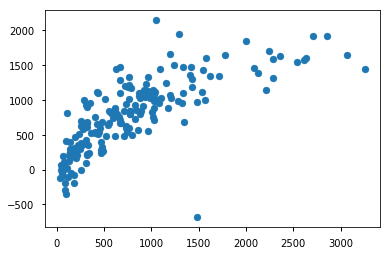

In [42]:
plt.scatter(y_test,predictions)

In [43]:
from sklearn.metrics import r2_score, mean_squared_error

# R2 score closer to 1 is a good model
print('R2 score:',r2_score(y_test, predictions))

# MSE score closer to zero is a good model
print('MSE score:', mean_squared_error(y_test, predictions))

R2 score: 0.573612560632
MSE score: 183924.016315


In [44]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

<span style="color:blue">
    
### YOUR ANSWER HERE


</span>